# Descriptive Statistics Analysis
## Thesis Behavioral Experiment Data

This notebook provides comprehensive descriptive statistics for the two-step decision task experiment, including:
- Sample characteristics by age group
- Reaction time analysis 
- Reward rate distributions
- APA-7 formatted visualizations

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import MultipleLocator, MaxNLocator

In [44]:
# =============================================================================
# APA-7 VISUAL CONFIGURATION
# =============================================================================
# Set up consistent APA-7 styling for all plots

# Configure matplotlib and seaborn for APA-7 compliance
import matplotlib.pyplot as plt
import seaborn as sns

# APA-7 Font Configuration
plt.rcParams['font.family'] = 'Times New Roman'  # APA-7 recommended font
plt.rcParams['font.size'] = 12  # Base font size

# APA-7 Figure Settings
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.dpi'] = 300  # High resolution for publication

# Remove top and right spines (APA-7 style)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True

# APA-7 Font Sizes
APA_TITLE_SIZE = 12
APA_LABEL_SIZE = 12
APA_TICK_SIZE = 10
APA_LEGEND_SIZE = 10

# APA-7 Colors (professional, accessible, colorblind-friendly)
APA_BLUE = '#2E86AB'      # Professional blue
APA_ORANGE = '#FF8C00'    # Professional orange
APA_GRAY = '#4A4A4A'      # Dark gray for text
APA_LIGHT_GRAY = '#E5E5E5'  # Light gray for backgrounds

# Transparency level
APA_ALPHA = 0.7

# Set seaborn style for clean, minimal plots
sns.set_style("white")
sns.set_context("paper", font_scale=1.0)

# Function to apply APA-7 formatting to any plot
def apply_apa_style(ax, title=None, xlabel=None, ylabel=None):
    """Apply consistent APA-7 styling to matplotlib axes"""
    if title:
        ax.set_title(title, fontsize=APA_TITLE_SIZE, fontweight='normal', pad=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=APA_LABEL_SIZE)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=APA_LABEL_SIZE)
    
    ax.tick_params(labelsize=APA_TICK_SIZE)
    sns.despine(ax=ax)  # Remove top and right spines
    plt.tight_layout()
    
    return ax

print("APA-7 visual configuration loaded successfully!")
print(f"Font: Times New Roman")
print(f"Title size: {APA_TITLE_SIZE}pt, Label size: {APA_LABEL_SIZE}pt, Tick size: {APA_TICK_SIZE}pt")
print(f"Colors: Blue {APA_BLUE}, Orange {APA_ORANGE}")
print("Use apply_apa_style(ax, title, xlabel, ylabel) for consistent formatting")

APA-7 visual configuration loaded successfully!
Font: Times New Roman
Title size: 12pt, Label size: 12pt, Tick size: 10pt
Colors: Blue #2E86AB, Orange #FF8C00
Use apply_apa_style(ax, title, xlabel, ylabel) for consistent formatting


In [45]:
df = pd.read_csv('online_data_for_matlab_merged.csv')

In [46]:
# Create subject summary with means using named aggregation
subject_summary = df.groupby('subject_id').agg(
    mean_rt1=('rt_1', 'mean'),
    mean_rt2=('rt_2', 'mean'),
    reward_rate=('reward', 'mean'),
    age=('age', 'first'),
    gender=('gender', 'first')
).reset_index()

def categorize_age(age):
    age_floor = int(age)  # Take the integer part (floor)
    if 8 <= age_floor <= 12:
        return 'Children'
    elif 13 <= age_floor <= 17:
        return 'Adolescents'
    elif 18 <= age_floor <= 25:
        return 'Adults'
    else:
        return 'Other'  # for ages outside your defined ranges

# Add age group to both dataframes
df['age_group'] = df['age'].apply(categorize_age)
subject_summary['age_group'] = subject_summary['age'].apply(categorize_age)

# Check the distribution
print("Age group distribution:")
print(subject_summary['age_group'].value_counts())
print("\nAge group by gender:")
print(pd.crosstab(subject_summary['gender'], subject_summary['age_group']))
print(f"Number of subjects: {len(subject_summary)}")
print(f"Other count: {subject_summary['age_group'].value_counts().get('Other', 0)}")


Age group distribution:
age_group
Adults         51
Adolescents    50
Children       50
Name: count, dtype: int64

Age group by gender:
age_group  Adolescents  Adults  Children
gender                                  
Female              25      26        25
Male                25      25        25
Number of subjects: 151
Other count: 0


In [49]:
# =============================================================================
# SAMPLE CHARACTERISTICS TABLE
# =============================================================================

# Overall sample statistics
total_n = len(subject_summary)
total_female = len(subject_summary[subject_summary['gender'] == 'Female'])
total_male = len(subject_summary[subject_summary['gender'] == 'Male'])
total_pct_female = (total_female / total_n) * 100
total_pct_male = (total_male / total_n) * 100

# Overall age statistics
overall_mean_age = subject_summary['age'].mean()
overall_sd_age = subject_summary['age'].std()
overall_min_age = subject_summary['age'].min()
overall_max_age = subject_summary['age'].max()

# Create detailed statistics table
table_data = []

# Overall row
overall_stats = {
    'Group': 'Overall',
    'N': total_n,
    'Female (%)': f"{total_female} ({total_pct_female:.1f}%)",
    'Male (%)': f"{total_male} ({total_pct_male:.1f}%)",
    'Age M (SD)': f"{overall_mean_age:.2f} ({overall_sd_age:.2f})",
    'Age Range': f"{overall_min_age:.1f}-{overall_max_age:.1f}"
}
table_data.append(overall_stats)

# By age group
for age_group in ['Children', 'Adolescents', 'Adults']:
    group_data = subject_summary[subject_summary['age_group'] == age_group]
    
    if len(group_data) > 0:
        group_n = len(group_data)
        group_n_female = len(group_data[group_data['gender'] == 'Female'])
        group_n_male = len(group_data[group_data['gender'] == 'Male'])
        group_pct_female = (group_n_female / group_n) * 100
        group_pct_male = (group_n_male / group_n) * 100
        
        group_mean_age = group_data['age'].mean()
        group_sd_age = group_data['age'].std()
        group_min_age = group_data['age'].min()
        group_max_age = group_data['age'].max()
        
        group_stats = {
            'Group': age_group,
            'N': group_n,
            'Female (%)': f"{group_n_female} ({group_pct_female:.1f}%)",
            'Male (%)': f"{group_n_male} ({group_pct_male:.1f}%)",
            'Age M (SD)': f"{group_mean_age:.2f} ({group_sd_age:.2f})",
            'Age Range': f"{group_min_age:.1f}-{group_max_age:.1f}"
        }
        table_data.append(group_stats)

# Create and display table
table_df = pd.DataFrame(table_data)
print("SAMPLE CHARACTERISTICS")
print("=" * 80)
print(table_df.to_string(index=False))
print("=" * 80)


SAMPLE CHARACTERISTICS
      Group   N Female (%)   Male (%)   Age M (SD) Age Range
    Overall 151 76 (50.3%) 75 (49.7%) 16.01 (4.98)  8.1-25.7
   Children  50 25 (50.0%) 25 (50.0%) 10.51 (1.45)  8.1-12.9
Adolescents  50 25 (50.0%) 25 (50.0%) 15.58 (1.45) 13.2-18.0
     Adults  51 26 (51.0%) 25 (49.0%) 21.83 (2.30) 18.2-25.7


RT DESCRIPTIVES (150-3000 ms):
RT1: M = 515.62, SD = 360.10
RT2: M = 658.96, SD = 380.17

BY AGE GROUP:
Children:
  RT1: M = 608.91, SD = 413.15
  RT2: M = 733.97, SD = 423.97
Adolescents:
  RT1: M = 473.34, SD = 310.26
  RT2: M = 629.19, SD = 336.16
Adults:
  RT1: M = 469.52, SD = 335.02
  RT2: M = 617.89, SD = 367.50

BY GENDER:
Female:
  RT1: M = 537.74, SD = 370.82
  RT2: M = 687.50, SD = 387.84
Male:
  RT1: M = 491.87, SD = 346.67
  RT2: M = 629.26, SD = 369.71


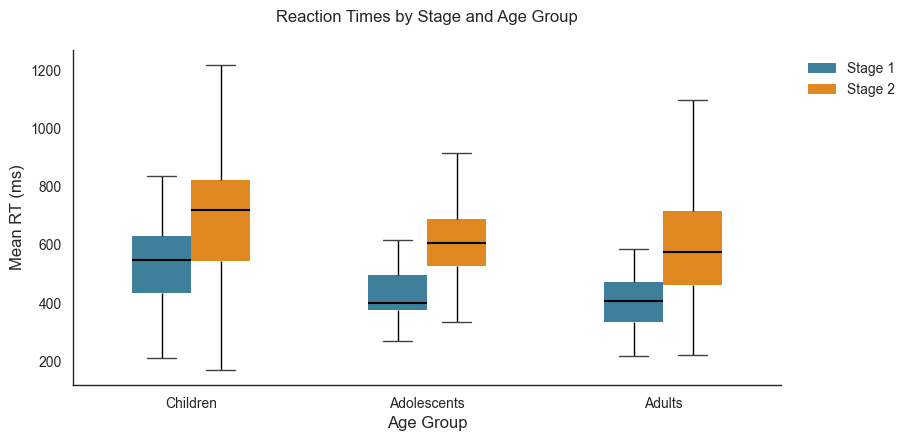

In [50]:
# Response time descriptives and visual (150-3000 ms range)

# Filter valid RTs
valid_rt1 = df[(df['rt_1'] >= 150) & (df['rt_1'] <= 3000)]['rt_1']
valid_rt2 = df[(df['rt_2'] >= 150) & (df['rt_2'] <= 3000)]['rt_2']

# Overall RT descriptives
print("RT DESCRIPTIVES (150-3000 ms):")
print(f"RT1: M = {valid_rt1.mean():.2f}, SD = {valid_rt1.std():.2f}")
print(f"RT2: M = {valid_rt2.mean():.2f}, SD = {valid_rt2.std():.2f}")

# By age group
print("\nBY AGE GROUP:")
for age_group in ['Children', 'Adolescents', 'Adults']:
    group_data = df[df['age_group'] == age_group]
    
    group_rt1 = group_data[(group_data['rt_1'] >= 150) & (group_data['rt_1'] <= 3000)]['rt_1']
    group_rt2 = group_data[(group_data['rt_2'] >= 150) & (group_data['rt_2'] <= 3000)]['rt_2']
    
    print(f"{age_group}:")
    print(f"  RT1: M = {group_rt1.mean():.2f}, SD = {group_rt1.std():.2f}")
    print(f"  RT2: M = {group_rt2.mean():.2f}, SD = {group_rt2.std():.2f}")

# By gender
print("\nBY GENDER:")
for gender in ['Female', 'Male']:
    gender_data = df[df['gender'] == gender]
    
    gender_rt1 = gender_data[(gender_data['rt_1'] >= 150) & (gender_data['rt_1'] <= 3000)]['rt_1']
    gender_rt2 = gender_data[(gender_data['rt_2'] >= 150) & (gender_data['rt_2'] <= 3000)]['rt_2']
    
    print(f"{gender}:")
    print(f"  RT1: M = {gender_rt1.mean():.2f}, SD = {gender_rt1.std():.2f}")
    print(f"  RT2: M = {gender_rt2.mean():.2f}, SD = {gender_rt2.std():.2f}")

# subject-level RTs with age groups
subject_summary_age = df.groupby("subject_id").agg(
    mean_rt1=("rt_1", "mean"),
    mean_rt2=("rt_2", "mean"),
    age_group=("age_group", "first")
).reset_index()

long_rt_age = subject_summary_age.melt(
    id_vars="age_group",
    value_vars=["mean_rt1", "mean_rt2"],
    var_name="Stage",
    value_name="RT"
).replace({"Stage": {"mean_rt1": "Stage 1", "mean_rt2": "Stage 2"}})

fig, ax = plt.subplots(figsize=(8, 4.5))
bp = sns.boxplot(
    data=long_rt_age,
    x="age_group",
    y="RT",
    hue="Stage",
    order=["Children", "Adolescents", "Adults"],
    palette=[APA_BLUE, APA_ORANGE],  # Using APA-7 colors
    showcaps=True,
    boxprops=dict(edgecolor="none"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black", linewidth=1.5),
    showfliers=False,
    width=0.5,
    dodge=True,
    ax=ax
)

# Apply transparency
for artist in ax.artists:
    artist.set_alpha(APA_ALPHA)

# Apply APA-7 styling
apply_apa_style(ax, 
    title="Reaction Times by Stage and Age Group",
    xlabel="Age Group", 
    ylabel="Mean RT (ms)")

ax.legend(title=None, frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=APA_LEGEND_SIZE)
plt.show()

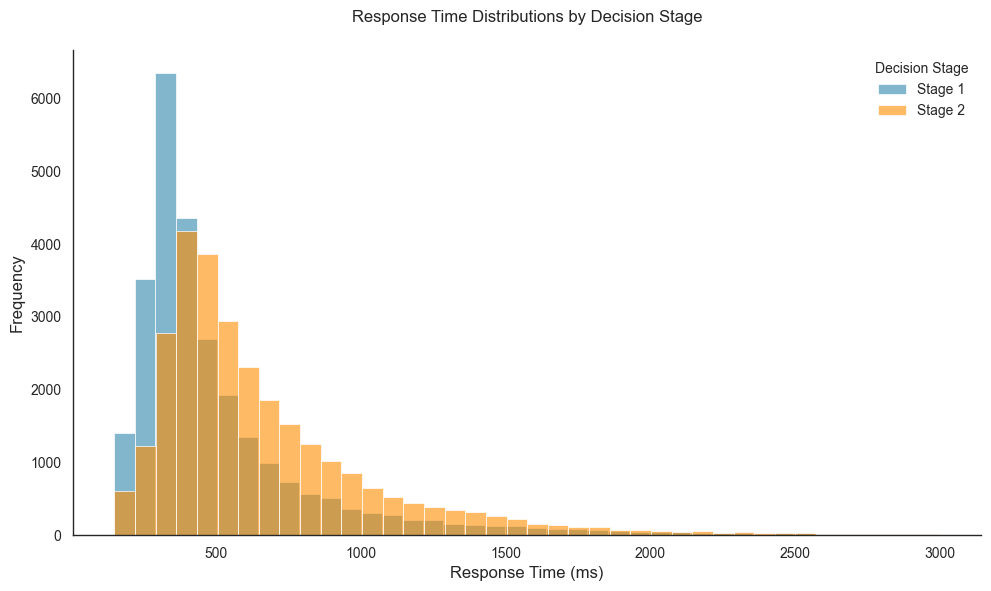

RT DISTRIBUTION STATISTICS (150-3000 ms):

Stage 1:
  Total trials: 26948
  Mean: 515.62 ms
  Median: 394.21 ms
  SD: 360.10 ms
  Range: 150 - 2989 ms
  25th percentile: 312.27 ms
  75th percentile: 574.77 ms

Stage 2:
  Total trials: 28492
  Mean: 658.96 ms
  Median: 543.39 ms
  SD: 380.17 ms
  Range: 150 - 2999 ms
  25th percentile: 407.90 ms
  75th percentile: 795.00 ms


In [56]:
# =============================================================================
# RESPONSE TIME DISTRIBUTION VISUALIZATION
# =============================================================================

# Create overlaid RT distribution plot
fig, ax = plt.subplots(figsize=(10, 6))

# Stage 1 RT distribution (blue)
sns.histplot(
    data=df[(df['rt_1'] >= 150) & (df['rt_1'] <= 3000)], 
    x='rt_1', 
    bins=40, 
    color=APA_BLUE,
    alpha=0.6,  # More transparent for overlay effect
    edgecolor="white",
    linewidth=0.5,
    label="Stage 1",
    ax=ax
)

# Stage 2 RT distribution (orange) overlaid
sns.histplot(
    data=df[(df['rt_2'] >= 150) & (df['rt_2'] <= 3000)], 
    x='rt_2', 
    bins=40, 
    color=APA_ORANGE,
    alpha=0.6,  # More transparent for overlay effect
    edgecolor="white",
    linewidth=0.5,
    label="Stage 2",
    ax=ax
)

# Apply APA-7 styling
apply_apa_style(ax, 
    title="Response Time Distributions by Decision Stage",
    xlabel="Response Time (ms)", 
    ylabel="Frequency")

# Add legend
ax.legend(title="Decision Stage", frameon=False, fontsize=APA_LEGEND_SIZE, 
          title_fontsize=APA_LEGEND_SIZE, loc='upper right')

plt.tight_layout()
plt.show()

# Print RT distribution statistics
print("RT DISTRIBUTION STATISTICS (150-3000 ms):")
print("=" * 60)
for stage, rt_col in [("Stage 1", "rt_1"), ("Stage 2", "rt_2")]:
    print(f"\n{stage}:")
    valid_rt = df[(df[rt_col] >= 150) & (df[rt_col] <= 3000)][rt_col]
    print(f"  Total trials: {len(valid_rt)}")
    print(f"  Mean: {valid_rt.mean():.2f} ms")
    print(f"  Median: {valid_rt.median():.2f} ms") 
    print(f"  SD: {valid_rt.std():.2f} ms")
    print(f"  Range: {valid_rt.min():.0f} - {valid_rt.max():.0f} ms")
    print(f"  25th percentile: {valid_rt.quantile(0.25):.2f} ms")
    print(f"  75th percentile: {valid_rt.quantile(0.75):.2f} ms")

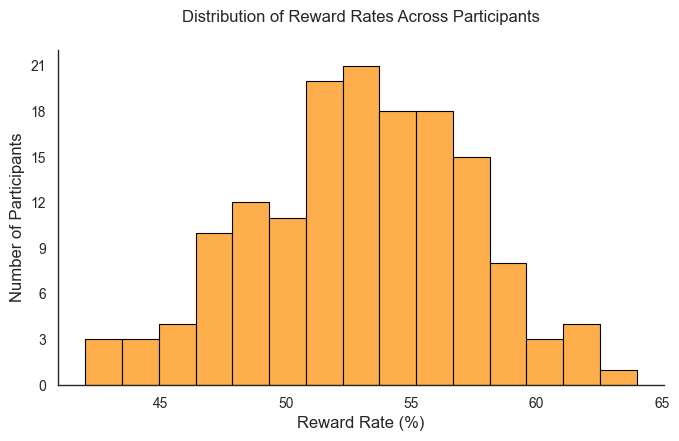

REWARD RATE SUMMARY:
Mean: 52.98%
SD: 4.39%
Range: 42.0% - 64.0%
Median: 53.50%


In [52]:
# =============================================================================
# REWARD RATE DISTRIBUTION VISUALIZATION
# =============================================================================

fig, ax = plt.subplots(figsize=(7, 4.5))

# Create histogram with APA-7 styling
sns.histplot(
    subject_summary["reward_rate"] * 100, 
    bins=15, 
    color=APA_ORANGE, 
    edgecolor="black", 
    alpha=APA_ALPHA, 
    ax=ax
)

# Apply APA-7 styling
apply_apa_style(ax, 
    title="Distribution of Reward Rates Across Participants",
    xlabel="Reward Rate (%)", 
    ylabel="Number of Participants")

# Ensure integer y-axis counts
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

# Print summary statistics
print("REWARD RATE SUMMARY:")
print(f"Mean: {reward_rates.mean():.2f}%")
print(f"SD: {reward_rates.std():.2f}%") 
print(f"Range: {reward_rates.min():.1f}% - {reward_rates.max():.1f}%")
print(f"Median: {reward_rates.median():.2f}%")